In [4]:
%load_ext Ddip
%makedip -r -a fastai_v1 -g all --verbose True

The Ddip extension is already loaded. To reload it, use:
  %reload_ext Ddip
Proc [21249] DDP.exit_group(): [0, 1, 2]
Proc [21249] Terminating ipcluster process [21375] with by 'ipcluster stop', just a few seconds ....
Proc [21249] no running ipcluster process.
Waiting for connection file: ~/.ipython/profile_default/security/ipcontroller-ippdpp_c-client.json


Proc [21249] Connecting to ipyparallel cluster.......

Proc [21249] Initializing torch distributed group with GPUs [0, 1, 2]
Proc [21249] Local Ranks initialized:  ['GPU0=0', 'GPU1=1', 'GPU2=2']
Proc [21249] Importing on cluster: ['import fastai, fastai.torch_core, torch, fastprogress', 'from fastai.distributed import *', 'from Ddip.fastai_v1 import initializer, finalizer, set_verbose, lr_find_bypass']
Proc [21249]
fastai_v1:
[Process 21646] Rank 0 fastai initialized for distributed data parallel.
[Process 21648] Rank 1 fastai initialized for distributed data parallel.
[Process 21650] Rank 2 fastai initialized for distributed data parallel.


In [5]:
%%dip everywhere
from fastai.collab import *
from fastai.tabular import *

%%dip everywhere: Running cell in local namespace.
%%dip everywhere: Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


## Collaborative filtering example

`collab` models use data in a `DataFrame` of user, items, and ratings.

In [6]:
user,item,title = 'userId','movieId','title'

In [7]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/home/ndim1/.fastai/data/movie_lens_sample')

In [8]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [9]:
%dipush ratings
%autodip on

Pushing parameters to DDP namespace: ['ratings']
Auto Execution on DDP group: on, will run cell as %%dip


That's all we need to create and train a model:

In [10]:
data = CollabDataBunch.from_df(ratings, seed=42)

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


In [11]:
y_range = [0,5.5]

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


In [12]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


In [13]:
learn.fit_one_cycle(3, 5e-3)

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).
epoch     train_loss  valid_loss  time    
0         1.965993    1.949715    00:01                                                  
1         1.467695    0.889671    00:01                                                  
2         1.073354    0.787155    00:01                                                  


In [14]:
%autodip off

Auto Execution on DDP group: Off


## Movielens 100k

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [15]:
path=Config.data_path()/'ml-100k'

In [16]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [17]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
len(ratings)

100000

In [19]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [21]:
%dipush rating_movie title
%autodip on

Pushing parameters to DDP namespace: ['rating_movie', 'title']
Auto Execution on DDP group: on, will run cell as %%dip


In [22]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


In [23]:
data.show_batch()

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


[output:0]

userId,title,target
477,Circle of Friends (1995),4.0
378,City of Angels (1998),3.0
170,Money Talks (1997),3.0
234,Pollyanna (1960),4.0
89,Beautiful Girls (1996),3.0


In [24]:
y_range = [0,5.5]

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


In [25]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).
Proc [21646] Rank [0] Removing callback <class 'fastai.distributed.DistributedTrainer'> from learner.
Proc [21646] Rank [0] Removing callback <class 'fastai.distributed.DistributedRecorder'> from learner.
Proc [21646] Rank [0] Running lr_find() in non DDP mode
epoch     train_loss  valid_loss  time    
0         3.212851    #na#        00:00     ---------| 6.19% [87/1406 00:00<00:09 2.0265]
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


[output:0]

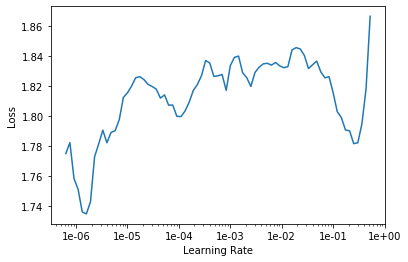

In [26]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [27]:
learn.fit_one_cycle(5, 5e-3)

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).
epoch     train_loss  valid_loss  time    
0         1.015488    0.961471    00:04                                                    
1         0.865189    0.869091    00:04                                                    
2         0.749191    0.827436    00:04                                                    
3         0.615849    0.812317    00:04                                                    
4         0.541574    0.811637    00:04                                                    


In [28]:
learn.save('dotprod')

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91, which corresponds to an MSE of `0.91**2 = 0.83`.

## Interpretation

### Setup

In [29]:
learn.load('dotprod');

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


In [30]:
learn.model

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


Out[0:14]: 
EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [31]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


Out[0:15]: 
array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

### Movie bias

In [32]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


Out[0:16]: torch.Size([1000])

In [33]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


In [34]:
item0 = lambda o:o[0]

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


In [35]:
sorted(movie_ratings, key=item0)[:15]

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


Out[0:19]: 
[(tensor(-0.3337),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.2942),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2517), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2377), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2329), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2278), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2251), 'Thinner (1996)', 2.4489795918367347),
 (tensor(-0.2202), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2135), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.2119), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2099), "Stephen King's The Langoliers (1995)", 2.413793103448276),
 (tensor(-0.2022), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2012), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.1998), 'Stuart Saves His Family (1995)', 2.125),
 (tenso

In [36]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


Out[0:20]: 
[(tensor(0.5377), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5088), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.4752), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.4649), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.4643), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.4484), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.4373), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4126), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4099), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4094), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.3933), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.3872), 'Apt Pupil (1998)', 4.1),
 (tensor(0.3848), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.3795), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.3757), 'Much Ado About Nothing (1993)', 4.0625)]

### Movie weights

In [37]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


Out[0:21]: torch.Size([1000, 40])

In [38]:
movie_pca = movie_w.pca(3)
movie_pca.shape

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


Out[0:22]: torch.Size([1000, 3])

In [39]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


In [40]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


Out[0:24]: 
[(tensor(1.1931), 'Close Shave, A (1995)'),
 (tensor(1.1594), 'Wrong Trousers, The (1993)'),
 (tensor(1.1374), 'Casablanca (1942)'),
 (tensor(1.1345), 'Lawrence of Arabia (1962)'),
 (tensor(1.0893), 'Godfather, The (1972)'),
 (tensor(1.0396), 'When We Were Kings (1996)'),
 (tensor(1.0326), 'Third Man, The (1949)'),
 (tensor(1.0315), 'Chinatown (1974)'),
 (tensor(1.0092), 'North by Northwest (1959)'),
 (tensor(0.9983), 'Secrets & Lies (1996)')]

In [41]:
sorted(movie_comp, key=itemgetter(0))[:10]

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


Out[0:25]: 
[(tensor(-1.4124), "McHale's Navy (1997)"),
 (tensor(-1.3947), 'Children of the Corn: The Gathering (1996)'),
 (tensor(-1.2872), 'Leave It to Beaver (1997)'),
 (tensor(-1.2825), 'Home Alone 3 (1997)'),
 (tensor(-1.2667), 'Free Willy 3: The Rescue (1997)'),
 (tensor(-1.2593), 'Jungle2Jungle (1997)'),
 (tensor(-1.2444), 'Bio-Dome (1996)'),
 (tensor(-1.2436), 'D3: The Mighty Ducks (1996)'),
 (tensor(-1.1954), 'Congo (1995)'),
 (tensor(-1.1397), 'Lawnmower Man 2: Beyond Cyberspace (1996)')]

In [42]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


In [43]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


Out[0:27]: 
[(tensor(1.1838), 'Braveheart (1995)'),
 (tensor(1.1466), 'Raiders of the Lost Ark (1981)'),
 (tensor(1.0478), 'Titanic (1997)'),
 (tensor(0.9654), "It's a Wonderful Life (1946)"),
 (tensor(0.9277), 'Independence Day (ID4) (1996)'),
 (tensor(0.8935), 'Pretty Woman (1990)'),
 (tensor(0.8833), 'Star Wars (1977)'),
 (tensor(0.8767), 'American President, The (1995)'),
 (tensor(0.8657), 'Indiana Jones and the Last Crusade (1989)'),
 (tensor(0.8646), 'Back to the Future (1985)')]

In [44]:
sorted(movie_comp, key=itemgetter(0))[:10]

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


Out[0:28]: 
[(tensor(-1.0625), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(-1.0119), 'Keys to Tulsa (1997)'),
 (tensor(-0.8555), 'Trainspotting (1996)'),
 (tensor(-0.8309), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(-0.8164), 'Clockwork Orange, A (1971)'),
 (tensor(-0.7848), 'Brazil (1985)'),
 (tensor(-0.7770), 'Beavis and Butt-head Do America (1996)'),
 (tensor(-0.7692), 'Lost Highway (1997)'),
 (tensor(-0.7672), 'Dead Man (1995)'),
 (tensor(-0.7666), 'Serial Mom (1994)')]

%%dip : Running cell in remote DDP namespace (GPUs: [0, 1, 2]).


[output:0]

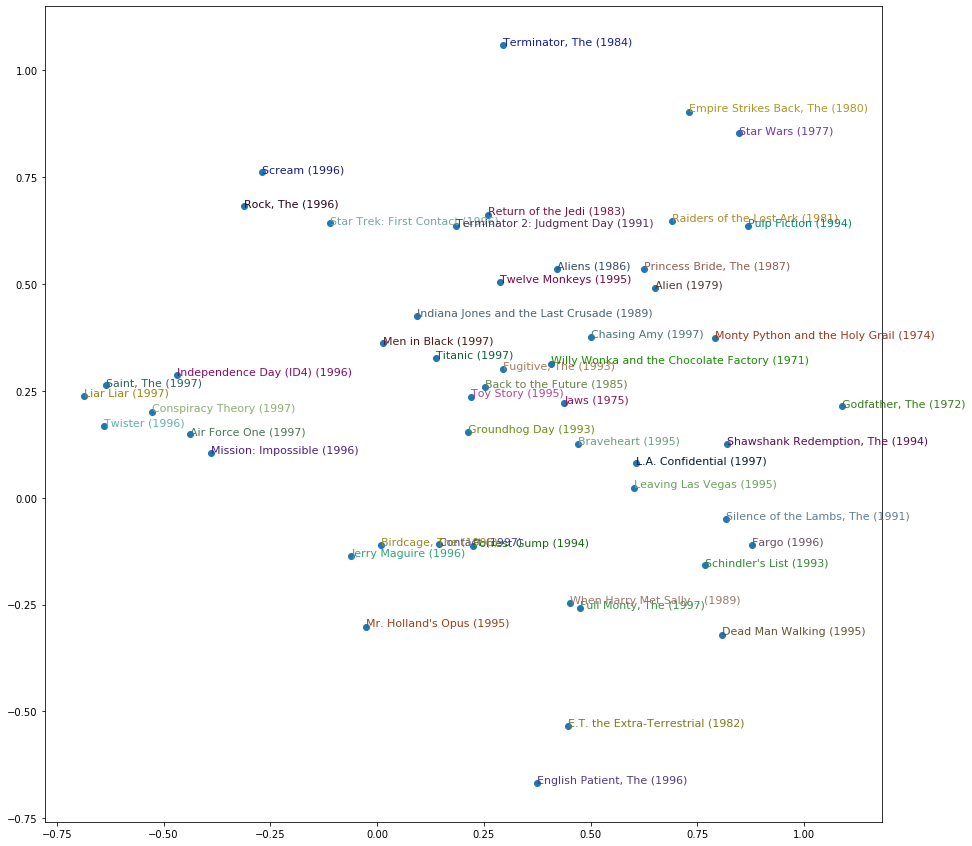

In [45]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()